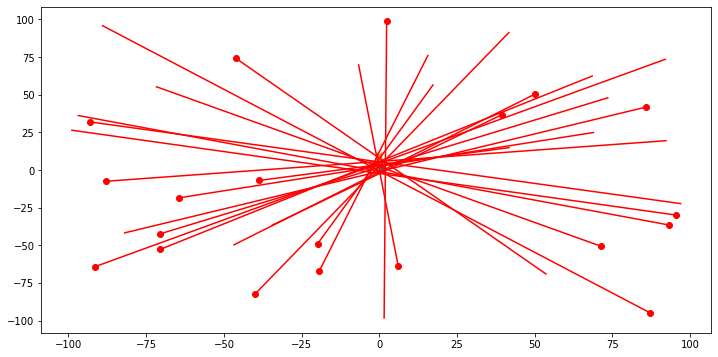

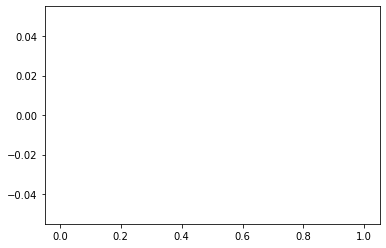

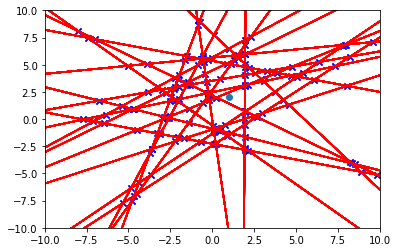

Intersections: 380
(-7.6969678287572085, -0.036646526268343915)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import math

class ray:
    
    #This is defined wrt (0,0)
    def __init__(self,o,a,l,sigma_angle=0.,sigma_x=0.,sigma_y=0.):
        self.origin = o
        self.angle  = a
        
        #y-y0 = m*(x-x0), with m = tan(angle)
        #k    = -m*x0 +y0
        #Ay = Bx + C
        self.tanA = math.tan(a)
        self.m = math.tan(a)
        self.k = -self.m*self.origin[0] + self.origin[1]        
        self.length = l
        self.d0 = self.getD0fromPoint(self.origin) #this should be always 0.0 
        self.end = [self.origin[0] + math.cos(self.angle)*self.length, self.origin[1] + math.sin(self.angle)*self.length]
        self.plotOrigin = [self.origin[0], self.end[0]]
        self.plotEnd    = [self.origin[1], self.end[1]]
        
        self.sigma_angle = sigma_angle

    #Signed distance, angle between [0,2pi]
    def transformToPoint(self,point):
        dx = self.origin[0] - point[0]
        dy = self.origin[1] - point[1]
        angle=self.angle
        
        #while (angle > math.pi / 2):
        #    angle-=math.pi
        #while (angle < -math.pi / 2):
        #    angle+=math.pi
        
        sinphi = math.sin(angle)
        cosphi = math.cos(angle)
        #Wrong sign?!
        d0new  = (self.d0 + dx * sinphi - dy * cosphi)
        #self.d0 = d0new
        #self.angle = angle
        #self.d0err = abs(self.d0 * 0.05)
        return d0new
        
    #def getD0(self):
    #    return self.getD0fromPoint([0,0])
    
    #d = |k + mx0 -y0| / sqrt(1+m2)
    #Signed distance without transforming
    def getD0fromPoint(self,point):
        #return (-1)*(self.m*point[0] - point[1] + self.k) / math.sqrt(1 + self.m*self.m)
        return (self.m*point[0] - point[1] + self.k) / math.sqrt(1 + self.m*self.m)
    
def generateOrigins(point,size):
    x1 = np.random.uniform(point[0],point[0]+size[0])
    y1 = np.random.uniform(point[1],point[1]+size[1])
    return [x1,y1]

def generateAngles(angle,size):
    angle = np.random.uniform(angle,angle+size)
    return angle

#y - y1 = (y2-y1) / (x2-x1) *(x-x1)
#m = (y2-y1) / (x2-x1)
#k = -(y2-y1) / (x2-x1)*(x1) + y1
#This generates some noisy data towards a particular point given an origin 
def generatePointingRay(point, origin,sigmaAngle=0.05,sigmaXY=[4,4],sigmaL=2,distr="uniform"):
    scaleFactor=2
    angle  = math.atan2((point[1] - origin[1]), (point[0] - origin[0]))
    dx = (point[0] - origin[0])
    dy = (point[1] - origin[1])
    
    length = math.sqrt(dx*dx + dy*dy)
    
    if distr=="uniform":
        rand_angle  = generateAngles(angle,sigmaAngle)
        #rand_origin = generateOrigins(origin,sigmaXY)
        rand_length = generateAngles(length,sigmaL)*scaleFactor

    return [origin,rand_angle,rand_length]

#origins = [[1,1],[1,2],[1.5,2.5]]
#angles  = [0.2,0.6,0.7]
#lengths = [5,4,7]
#lines=[]

fireLocation = [1,2]
measurements = 20
#origins = [[47,22],[35,25],[-20,-30],[-33,11],[15,15],[30,26],[60,10],[102,76]]

#generate random origins pointing to the fire
origins=[]
for i in range(measurements):
    or_x = np.random.uniform(-100,100)
    or_y = np.random.uniform(-100,100)
    origin=[or_x,or_y]
    origins.append(origin)

rays = []
d0s=[]
fig, ax = plt.subplots(figsize=(12, 6))

#origins=[[-10,-10],[10,0],[-10,10]]
#angles =[math.pi / 4., math.pi, -math.pi /4.]

for i in range(len(origins)):
    pointingRay = generatePointingRay(fireLocation,origins[i],sigmaAngle=0.05)
    #rays.append(ray(origins[i],angles[i],50))
    rays.append(ray(pointingRay[0],pointingRay[1],pointingRay[2]))
    ax.plot(rays[i].plotOrigin,rays[i].plotEnd,color="red")
    ax.scatter(origins[i][0],origins[i][1],color="red")
    #print ("Distance from fireLocation:",rays[i].getD0fromPoint(fireLocation))
    #print (rays[i].getD0fromPoint(origins[i]))
    #print (rays[i].getD0fromPoint(rays[i].end))
    #d0s.append(rays[i].getD0fromPoint(fireLocation))
    #d0s.append(rays[i].getD0fromPoint(rays[i].end))
    
plt.scatter(fireLocation[0],fireLocation[1],marker="o")
plt.scatter(0,10,marker="x")
plt.show()


plt.hist(d0s)
plt.show()

def get_intersect(a1, a2, b1, b2):
    """ 
    Returns the point of intersection of the lines passing through a2,a1 and b2,b1.
    a1: [x, y] a point on the first line
    a2: [x, y] another point on the first line
    b1: [x, y] a point on the second line
    b2: [x, y] another point on the second line
    """
    s = np.vstack([a1,a2,b1,b2])        # s for stacked
    h = np.hstack((s, np.ones((4, 1)))) # h for homogeneous
    l1 = np.cross(h[0], h[1])           # get first line
    l2 = np.cross(h[2], h[3])           # get second line
    x, y, z = np.cross(l1, l2)          # point of intersection
    if z == 0:                          # lines are parallel
        return (float('inf'), float('inf'))
    return (x/z, y/z)

def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if abs(div) <1e-6:
       return False

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

#plt.plot(rays[0][0], rays[0][1])
#plt.plot(rays[1][0], rays[1][1])

#R1 = line_intersection(rays[0],rays[1])
#if R1:
#    plt.scatter(R1[0],R1[1],marker="x")


intersections = []

for iray in range(len(rays)):
    for jray in range(len(rays)):
        if jray == iray:
            continue
        R1 = get_intersect(rays[iray].origin,rays[iray].end,rays[jray].origin,rays[jray].end)
        intersections.append(R1)
        plt.plot(rays[iray].plotOrigin,rays[iray].plotEnd,color="red")
        plt.plot(rays[jray].plotOrigin,rays[jray].plotEnd,color="red")
        plt.scatter(R1[0],R1[1],marker="x",color="blue")
        plt.xlim([-10,10])
        plt.ylim([-10,10])
plt.scatter(fireLocation[0],fireLocation[1],marker="o")

plt.show()
print("Intersections:",len(intersections))
print(intersections[0])


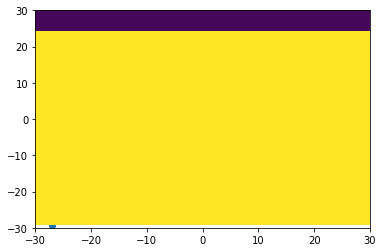

561689 739 49
[0.5443377969937728, 5.654385042008137]


In [2]:
#make a 2D histogram of the intersections
x = [intersection[0] for intersection in intersections]
y = [intersection[1] for intersection in intersections]
plt.scatter(x,y)
plt.hist2d(x, y, bins=(10, 10))
plt.xlim([-30,30])
plt.ylim([-30,30])
plt.show()

xmin, xmax = min(x), max(x)
ymin, ymax = min(y), max(y)
rang = [[xmin, xmax], [ymin, ymax]]
H, xedges, yedges = np.histogram2d(x, y,range=rang,bins=len(x)*2)
idx = list(H.flatten()).index(H.max())
x, y = int(idx / H.shape[1]), idx % H.shape[1]
print(idx,x,y)
seed = [(xedges[x]+xedges[x+1])/2.,(yedges[y]+yedges[y+1])/2.]
print(seed)


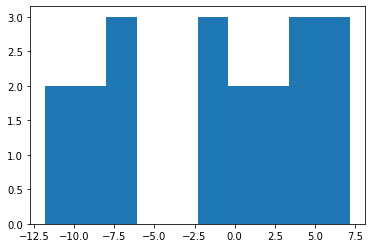

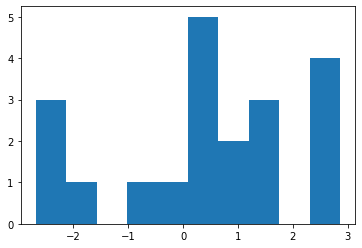

In [3]:
#Transform the rays coordinates to the seed location and check the d0s
reco_d0s   = []
reco_phi0s = []

#print(seed)
seed=[0,10]

#for ir in range(len(rays)):
#    print("Origin "+str(ir)+":",rays[ir].origin)
#    print("Angle "+str(ir)+":",rays[ir].angle)
#    print("d0 from seed "+str(ir)+":",rays[ir].getD0fromPoint(seed))
#    print("d0 from seed (signed) " + str(ir)+":", rays[ir].transformToPoint(seed))
  
for ray in rays:
    reco_d0s.append(ray.transformToPoint(seed))
    reco_phi0s.append(ray.angle)
    
#print(reco_d0s)

plt.hist(reco_d0s)
plt.show()

plt.hist(reco_phi0s)
plt.show()


In [4]:
class BilloirSimple2DFitter():
    def __init__(self, tracks,d0s):
        self.tracks = tracks
        self.d0s = d0s
        self.ntracks = len(tracks)
        self.chi2 = 0
        self.x = 0.
        self.y = 0.
        self.track_weights = []                
        
    # from NIM A311 (1992) 139-150
    # For the simple vertex, the D matrix
    # in the plane is a 1x2 matrix.
    def computeD(self,track):
        #deps / dxv
        dd0dxv = +math.sin(track.angle)
        #deps / dxv
        dd0dyv = -math.cos(track.angle)
        dd0_row = np.array([dd0dxv,dd0dyv])
        return dd0_row
    def computewi(self,track):
        Dtrk = self.computeD(track)
        Wi = 1 #<<========== FIX THIS Covariance matrix 
        wi = np.outer(Dtrk,Wi*Dtrk)
        return wi
    def computeTrkPerigeePos(self,track,d0):
        xp = +d0 * math.sin(track.angle)
        yp = -d0 * math.cos(track.angle)
        return np.array([xp,yp])
    def computeVtxLocation(self):
        Swi  = np.array([[0.0,0.0],[0.0,0.0]])
        T    = np.array([0.0,0.0])
        for itrk in range(self.ntracks):
            trk=self.tracks[itrk]
            d0=self.d0s[itrk]
            wtrk = self.computewi(trk)
            Swi += wtrk
            xptrk = self.computeTrkPerigeePos(trk,d0)
            T += wtrk @ xptrk
        
        A=la.inv(Swi)
        V = A @ T
        return V



lastVtx = [0,10]
iter_d0=[]
raystofit=[]
for i in range(1):
    #print("lastVtx:",lastVtx)
    for iray in range(len(rays)):
        d0 = rays[iray].transformToPoint(lastVtx)
        #print(d0)
        iter_d0.append(d0)
        raystofit.append(rays[iray])
        
    
    billVtx_iter = BilloirSimple2DFitter(raystofit,iter_d0)
    dVtx = billVtx_iter.computeVtxLocation()
    #print("FitVtx:",dVtx)
    lastVtx += dVtx
    iter_d0 = []
    raystofit=[]

print("===>",lastVtx)
    

===> [-0.08296577  2.12591233]
